In [8]:
import pandas as pd
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

import statsmodels.api as sm
import datetime
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import datetime
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams.update({'font.size': 22})

In [10]:
df = pd.read_csv('../data/raw_data.csv', parse_dates=['moment'])

In [11]:
date_start = df.moment.min()

In [12]:
true_date = '02.02.2023'

In [21]:
col_name = ['SM_Exgauster\[0:10]']

In [22]:
def get_amplitude(y):
    """
    расчет амплитуды
    
    """
    
    np_fft = np.fft.fft(y)
    n_samples = len(np_fft)
    amplitudes = 2 / n_samples * np.abs(np_fft) 
    return max(amplitudes)

In [23]:
result = []
v = []
for i in df[col_name].index:
    v.append(df.loc[i, col_name].values)
    if len(v) >= 10:
        result.append(get_amplitude(v))
        v = []

In [24]:
amplitude = result[0:1150]

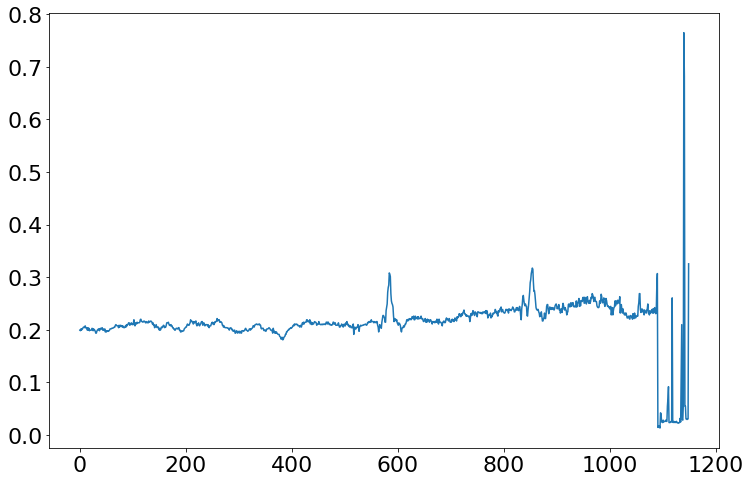

In [25]:
plt.plot(amplitude)

In [26]:
df_input_model = pd.DataFrame(result, columns=['feature'])

In [27]:
df_input = df_input_model[0:1000]

In [28]:
def get_linear_approx(x, y):
    model = LinearRegression()
    model.fit(x, y)
    
    return model.coef_, model.predict(x)

In [29]:
coeff, x_predict =  get_linear_approx(np.array(df_input.index).reshape(-1, 1), df_input.values)

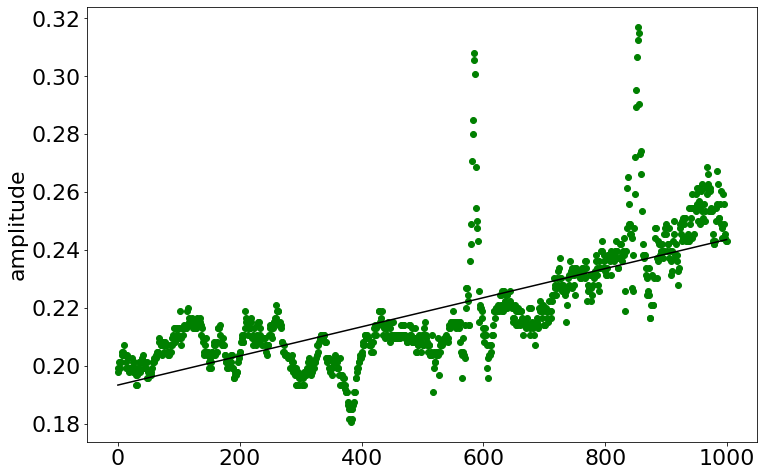

In [30]:
plt.scatter(df_input.index, df_input.values,color='g')
plt.plot(np.array(df_input.index).reshape(-1, 1), x_predict, color='k')

plt.ylabel('amplitude')
plt.show()

! Установить критическое значение амплитуды

In [31]:
x = 0.4 / coeff

In [32]:
x = x - len(df_input)

In [33]:
count_sepl = 10

In [34]:
now = datetime.datetime.now()

In [35]:
# result_data = now + datetime.timedelta(minutes=x[0][0]*count_sepl)
result_data = date_start + datetime.timedelta(minutes=x[0][0])

In [36]:
result_data

Timestamp('2023-01-30 02:21:51.339992')